In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/chat_dataset.csv')

In [ ]:
df.head(15)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative
5,This is a great product,positive
6,I wouldn't recommend this,negative
7,The price is a bit high,neutral
8,The weather is perfect today,positive
9,The traffic is horrible,negative


In [ ]:
df.shape

(584, 2)

In [ ]:
df.isnull().any() #checking null rows if present

,0
message,False
sentiment,False


In [ ]:
df.dropna(inplace=True)#removing null rows

In [ ]:
sentiments_count=df['sentiment'].value_counts()#exploring data

In [ ]:
sentiments_count

,count
sentiment,
neutral,259
positive,178
negative,147


In [ ]:
import matplotlib.pyplot as plt

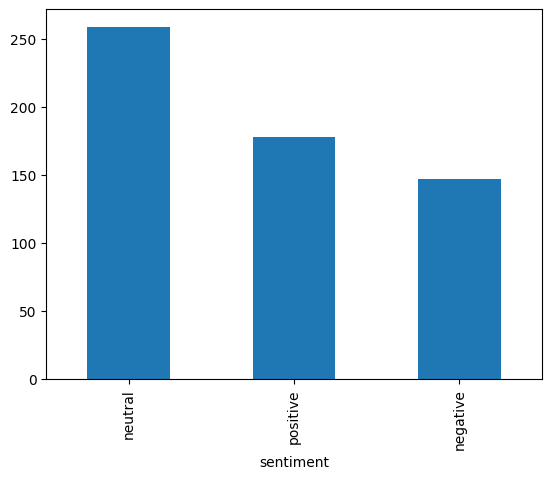

In [ ]:
plt.figure()
sentiments_count.plot(kind='bar')#Plots a bar chart for sentiment counts.
plt.show()#plotting the explored data

In [ ]:
df['processed_text']=df['message'].str.lower()#converting all text to lowercase

In [ ]:
df['processed_text']

,processed_text
0,i really enjoyed the movie
1,the food was terrible
2,i'm not sure how i feel about this
3,the service was excellent
4,i had a bad experience
...,...
579,i have to cancel my vacation plans because i c...
580,my computer crashed and i lost all my importan...
581,i got into a car accident and my car is totale...
582,i have a cold and can't stop coughing. it's re...


In [ ]:
df['processed_text'] = df['processed_text'].str.replace(r"http\S+|www\S+", "", regex=True)#removing URLs from the text

In [ ]:
df['processed_text']=df['processed_text'].str.replace(r"[^a-z\s]","",regex=True)#removing anything other than space and lowercase alphabets(like emojis, numbers etc)

In [ ]:
df['processed_text']

,processed_text
0,i really enjoyed the movie
1,the food was terrible
2,im not sure how i feel about this
3,the service was excellent
4,i had a bad experience
...,...
579,i have to cancel my vacation plans because i c...
580,my computer crashed and i lost all my importan...
581,i got into a car accident and my car is totaled
582,i have a cold and cant stop coughing its reall...


In [ ]:
df

,message,sentiment,processed_text
0,I really enjoyed the movie,positive,i really enjoyed the movie
1,The food was terrible,negative,the food was terrible
2,I'm not sure how I feel about this,neutral,im not sure how i feel about this
3,The service was excellent,positive,the service was excellent
4,I had a bad experience,negative,i had a bad experience
...,...,...,...
579,I have to cancel my vacation plans because I c...,negative,i have to cancel my vacation plans because i c...
580,My computer crashed and I lost all my importan...,negative,my computer crashed and i lost all my importan...
581,I got into a car accident and my car is totale...,negative,i got into a car accident and my car is totaled
582,I have a cold and can't stop coughing. it's re...,negative,i have a cold and cant stop coughing its reall...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectors=CountVectorizer()#Initializes the CountVectorizer object

In [ ]:

X=vectors.fit_transform(df['processed_text']).toarray()#Transforming the processed text into a matrix of token counts and converts it to an array


In [ ]:
Y=df['sentiment'].map({'positive':1,'neutral':2,'negative':3})#Maps the sentiment labels to numeric values (1 for positive, 2 for neutral, 3 for negative).

In [ ]:
from sklearn.model_selection import train_test_split#Imports the train_test_split function to split the data into training and testing sets

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)#Splits the data into training (90%) and testing (10%) sets.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()#Initializes a logistic regression model.

In [ ]:
model.fit(X_train,Y_train)#Trains the logistic regression model on the training data (X_train and Y_train).

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model.score(X_test,Y_test)#Evaluates the accuracy of the model on the test data and returns the score.

0.8813559322033898

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(X_test)#Use the trained model to predict the sentiment labels for the test dataset

In [ ]:
confusion_matrix(Y_test, y_pred)#Displays the confusion matrix which shows correct and incorrect classifications

array([[18,  1,  3],
       [ 0, 25,  0],
       [ 2,  1,  9]])

In [ ]:
classification_report(Y_test, y_pred)#Display the precision, recall, F1-score, and support for each sentiment class

'              precision    recall  f1-score   support\n\n           1       0.90      0.82      0.86        22\n           2       0.93      1.00      0.96        25\n           3       0.75      0.75      0.75        12\n\n    accuracy                           0.88        59\n   macro avg       0.86      0.86      0.86        59\nweighted avg       0.88      0.88      0.88        59\n'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)# Initialize the TF-IDF vectorizer with a maximum of 1000 features, ensuring that
# only the top 1000 most important words are considered
X_tfidf = tfidf.fit_transform(df['processed_text']).toarray()
# Fit the vectorizer to the 'processed_text' column and transform the text into a
# TF-IDF feature matrix, then convert it into an array format

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.1)
# Split the TF-IDF feature matrix into training and test datasets, with 10% used
# for testing, maintaining the correct mapping for the 'Y' labels

In [ ]:
model.score(X_test,Y_test)

0.9661016949152542

In [ ]:
#ANN model


In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(525, 675)

In [ ]:
Y_train.shape

(525,)

In [ ]:
num_classes = len(np.unique(Y_train))


In [ ]:
num_classes

3

In [ ]:
Y = df['sentiment'].map({'positive': 0, 'neutral': 1, 'negative': 2})

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.1)## Split the TF-IDF features and corresponding sentiment labels into training and
# test datasets, using 10% for testing

In [ ]:
ann_model = Sequential()# Initialize the Sequential model which will contain the layers of the ANN
ann_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))# Add the first hidden layer with 128 neurons, using ReLU as the activation function.
# The input dimension is set to the number of features in the training data
ann_model.add(Dense(64, activation='relu'))# Add a second hidden layer with 64 neurons, also using ReLU activation
ann_model.add(Dense(num_classes, activation='softmax'))# Add the output layer with the number of neurons equal to the number of sentiment
# classes, using softmax activation for multi-class classification

In [ ]:
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Compile the model, using sparse categorical cross-entropy as the loss function
# (for multi-class classification), and Adam optimizer for learning, while tracking accuracy

In [ ]:
ann_model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)# Train the model using the training data for 10 epochs, with a batch size of 32.
# Verbose set to 1 to display progress for each epoch

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3976 - loss: 1.0911   
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4501 - loss: 1.0308 
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 0.9317 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7615 - loss: 0.7475 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9047 - loss: 0.4999 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.2914 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.1592 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0918 
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9880 - loss: 0.0546 
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0394 


In [ ]:
loss, accuracy = ann_model.evaluate(X_test, Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9444 - loss: 0.2442 


In [ ]:
accuracy

0.9322034120559692

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200]}# Define a dictionary 'param_grid' containing hyperparameters for tuning.
# 'C' is the regularization strength for LogisticRegression and is being tested with four values: 0.1, 1, 10, 100.
# 'max_iter' specifies the maximum number of iterations for the solver and is tested with 100 and 200.
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1)# Initialize GridSearchCV with LogisticRegression as the model, using the parameter grid for tuning.
# 'refit=True' means the model will be refit using the best combination of parameters found.
# 'verbose=1' makes the process more detailed by printing progress messages during the fitting process.
grid.fit(X_train, Y_train)

# Best parameters
print(grid.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 10, 'max_iter': 100}


In [ ]:
history = ann_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9975 - loss: 0.0344 - val_accuracy: 0.9322 - val_loss: 0.2304
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9996 - loss: 0.0200 - val_accuracy: 0.9492 - val_loss: 0.2203
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9980 - loss: 0.0210 - val_accuracy: 0.9322 - val_loss: 0.2195
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9965 - loss: 0.0214 - val_accuracy: 0.9492 - val_loss: 0.2089
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9957 - loss: 0.0223 - val_accuracy: 0.9492 - val_loss: 0.2056
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9965 - loss: 0.0185 - val_accuracy: 0.9322 - val_loss: 0.2064
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9993 - loss: 0.0092 - val_accuracy: 0.9492 - val_loss: 0.2044
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9996 - loss: 0.0080 - val_accuracy: 0.9492 - val_loss

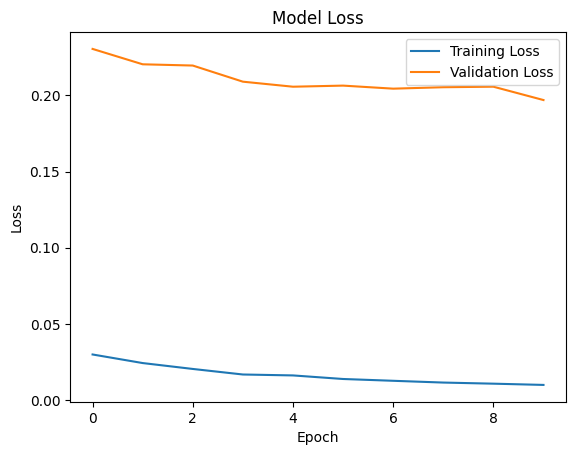

In [ ]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')#Plot the training loss for each epoch
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
#If both training and validation loss decrease steadily: This indicates that your model is learning well. It is improving its ability to minimize error on both the training and validation sets.
#If training loss decreases but validation loss plateaus or increases: This is a sign of overfitting. The model is becoming too specialized in learning the training data and is performing poorly on unseen validation data.
#If training and validation loss both stay high or do not decrease: This suggests that the model is underfitting, meaning it is not learning well enough from the data, and the model's complexity might be too low.

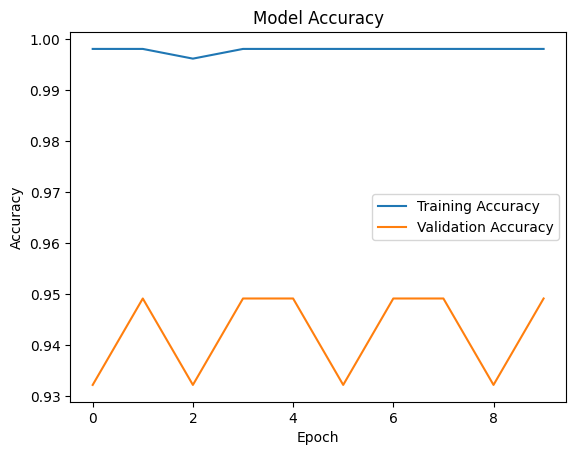

In [ ]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
#If both training and validation accuracy increase steadily: This is a good sign, indicating that your model is generalizing well and learning from the data effectively.
#If training accuracy increases but validation accuracy plateaus or decreases: Again, this is a sign of overfitting. The model is performing well on training data but poorly on validation data.
#If both accuracies remain low: This indicates underfitting. The model's capacity may be too low, or it is not learning patterns in the data properly.


Good Fit: If both training and validation loss decrease, and accuracy improves across epochs.

Overfitting: If training loss decreases but validation loss increases, and training accuracy is higher than validation accuracy.

Underfitting: If both training and validation loss remain high or both accuracies are low.